## Displaying the calexp from the DC2 pipeline run
##### Author: Harshit Rai
##### Date: 04/27/2023 12:23 AM

#### Contents of ApTemplate-DC2.yaml (pipeline file) derived from [this](https://pipelines.lsst.io/getting-started/dc2-guide.html#building-good-seeing-templates) tutorial.

#### Command to run the pipeline

#### Generating Calexp Images

In [1]:
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
afwDisplay.setDefaultBackend('matplotlib')

In [2]:
butler = Butler("/repo/dc2")

In [3]:
dataId = {'instrument': 'LSSTCam-imSim', 'detector': 51, 'exposure': 419000}

In [4]:
registry = butler.registry
collections = registry.queryCollections('*harshit*')

In [5]:
collections

['u/harshit/test-run-generate-calexp-202304261109',
 'u/harshit/test-run-generate-calexp-202304261109/20230426T181033Z',
 'u/harshit/test-run-generate-calexp-202304262336',
 'u/harshit/test-run-generate-calexp-202304262336/20230427T063852Z',
 'u/harshit/test-run-generate-calexp-202304262342',
 'u/harshit/test-run-generate-calexp-202304262342/20230427T064259Z',
 'u/harshit/test-run-generate-calexp-202304271340',
 'u/harshit/test-run-generate-calexp-202304271340/20230427T204409Z']

In [6]:
# Using the latest collection created by a successful pipeline run.
collection = "u/harshit/test-run-generate-calexp-202304271340"
for ref in butler.registry.queryDatasets('calexp', band='g', collections=collection, instrument='LSSTCam-imSim'):
    print(ref.dataId.full)

{band: 'g', instrument: 'LSSTCam-imSim', detector: 48, physical_filter: 'g_sim_1.4', visit: 254379}
{band: 'g', instrument: 'LSSTCam-imSim', detector: 51, physical_filter: 'g_sim_1.4', visit: 419000}
{band: 'g', instrument: 'LSSTCam-imSim', detector: 48, physical_filter: 'g_sim_1.4', visit: 419000}
{band: 'g', instrument: 'LSSTCam-imSim', detector: 54, physical_filter: 'g_sim_1.4', visit: 254358}
{band: 'g', instrument: 'LSSTCam-imSim', detector: 51, physical_filter: 'g_sim_1.4', visit: 254379}
{band: 'g', instrument: 'LSSTCam-imSim', detector: 54, physical_filter: 'g_sim_1.4', visit: 183772}


In [7]:
# Define a method that can be used to generate calexp image repetitively
def display_calexp_image(visit: int, detector: int):
    calexp = butler.get('calexp', visit=visit, detector=detector, collections=collection, instrument='LSSTCam-imSim')
    fig = plt.figure()
    display = afwDisplay.Display(frame=fig)
    display.scale('asinh', 'zscale')
    display.mtv(calexp.image)
    plt.show()

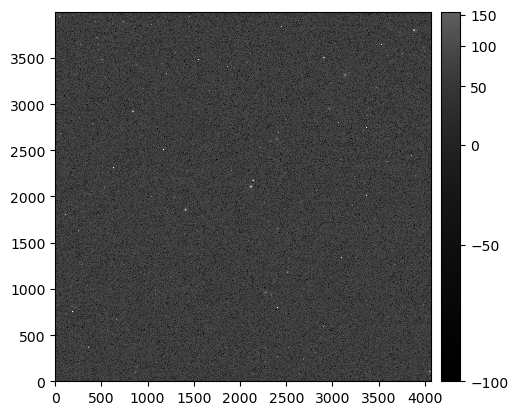

In [8]:
display_calexp_image(254379, 48)

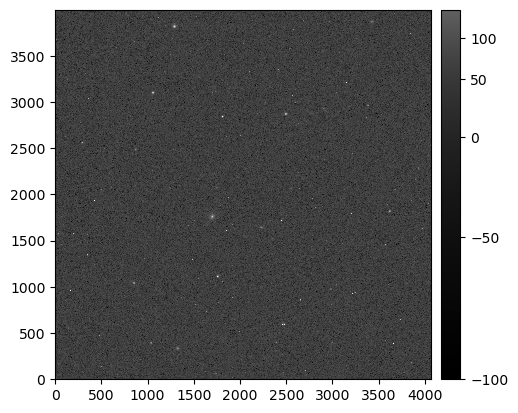

In [9]:
display_calexp_image(254358, 54)

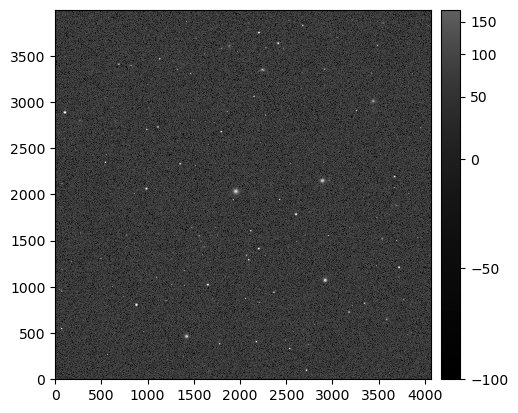

In [10]:
display_calexp_image(419000, 51)

In [11]:
!eups list | grep butler

daf_butler            g4ebb90a088+3070c2f738 	current w_2023_17 setup


In [12]:
print("Execution Complete!")

Execution Complete!
